<a href="https://colab.research.google.com/github/ananta2004/Grace/blob/main/edna0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Make the main project folder + subfolders
!mkdir -p /content/drive/MyDrive/P2-edna/{data,db,refs,results,notebooks,webapp}


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Update package lists
!apt-get -y update

# Install tools
!apt-get -y install ncbi-blast+ bowtie2 fastp hmmer infernal mmseqs2


Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 https://cli.github.com/packages stable/main amd64 Packages [346 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,006 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backport

In [6]:
!pip -q install hdbscan scikit-learn biopython plotly pandas numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.1 MB/s eta 0:00:00


In [7]:

!apt-get update
!apt-get install ncbi-blast+ -y


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://cli.github.com/packages stable InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [8]:
!blastn -version
!fastp --version
!bowtie2 --version
!hmmsearch -h | head -n 1
!mmseqs version


blastn: 2.12.0+
 Package: blast 2.12.0, build Mar  8 2022 16:19:08
fastp 0.20.1
/usr/bin/bowtie2-align-s version 2.4.4
64-bit
# hmmsearch :: search profile(s) against a sequence database
13-45111+ds-2


In [9]:

%cd /content/drive/MyDrive/P2-edna/db

/content/drive/MyDrive/P2-edna/db


In [10]:
# Go to your db folder
%cd /content/drive/MyDrive/P2-edna/db

# Download & extract 16S rRNA database
!wget ftp://ftp.ncbi.nlm.nih.gov/blast/db/16S_ribosomal_RNA.tar.gz
!tar -xvzf 16S_ribosomal_RNA.tar.gz
!rm 16S_ribosomal_RNA.tar.gz

# Download & extract SSU eukaryote rRNA
!wget ftp://ftp.ncbi.nlm.nih.gov/blast/db/SSU_eukaryote_rRNA.tar.gz
!tar -xvzf SSU_eukaryote_rRNA.tar.gz
!rm SSU_eukaryote_rRNA.tar.gz

# Download & extract LSU eukaryote rRNA
!wget ftp://ftp.ncbi.nlm.nih.gov/blast/db/LSU_eukaryote_rRNA.tar.gz
!tar -xvzf LSU_eukaryote_rRNA.tar.gz
!rm LSU_eukaryote_rRNA.tar.gz

# Download & extract ITS (fungi/eukaryotes)
!wget ftp://ftp.ncbi.nlm.nih.gov/blast/db/ITS_eukaryote_sequences.tar.gz
!tar -xvzf ITS_eukaryote_sequences.tar.gz
!rm ITS_eukaryote_sequences.tar.gz

# Download & extract taxonomy database
!wget ftp://ftp.ncbi.nlm.nih.gov/blast/db/taxdb.tar.gz
!tar -xvzf taxdb.tar.gz
!rm taxdb.tar.gz

# (Optional) Download & extract core_nt (tiny fallback DB)
!wget ftp://ftp.ncbi.nlm.nih.gov/blast/db/core_nt.tar.gz
!tar -xvzf core_nt.tar.gz
!rm core_nt.tar.gz


/content/drive/MyDrive/P2-edna/db
--2025-09-09 18:44:20--  ftp://ftp.ncbi.nlm.nih.gov/blast/db/16S_ribosomal_RNA.tar.gz
           => ‘16S_ribosomal_RNA.tar.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 130.14.250.7, 130.14.250.10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /blast/db ... done.
==> SIZE 16S_ribosomal_RNA.tar.gz ... 67616532
==> PASV ... done.    ==> RETR 16S_ribosomal_RNA.tar.gz ... done.
Length: 67616532 (64M) (unauthoritative)

16S_ribosomal_RNA.t 100%[===================>]  64.48M  47.0MB/s    in 1.4s    

2025-09-09 18:44:21 (47.0 MB/s) - ‘16S_ribosomal_RNA.tar.gz’ saved [67616532]

16S_ribosomal_RNA.ndb
16S_ribosomal_RNA.nhr
16S_ribosomal_RNA.nin
16S_ribosomal_RNA.nnd
16S_ribosomal_RNA.nni
16S_ribosomal_RNA.nog
16S_ribosomal_RNA.nos
16S_ribosomal_RNA.not
16S_ribosomal_RNA.ns

In [11]:
# 1. Create a tiny FASTA with one test sequence
!echo -e ">test\nAGAGTTTGATCCTGGCTCAG" > test.fasta

# 2. Run BLAST against SSU (as example, you can also try 16S, ITS, LSU)
!blastn -query test.fasta -db SSU_eukaryote_rRNA -out test_out.txt -outfmt 6 -max_target_seqs 3

# 3. Show the output
!cat test_out.txt


In [12]:
!blastn -query test.fasta -db SSU_eukaryote_rRNA -out test_out.txt -outfmt 6 -max_target_seqs 10
!cat test_out.txt



In [13]:

# Step 3.0: Download a small test FASTQ (real data)
!apt-get -y install sra-toolkit
!fastq-dump --split-files --gzip -X 100000 SRR390728
  # a small Illumina run
# Output: SRR390728_1.fastq.gz & SRR390728_2.fastq.gz

# Step 3.1: Run fastp for cleaning
!fastp -i SRR390728_1.fastq.gz -I SRR390728_2.fastq.gz \
       -o clean_R1.fastq.gz -O clean_R2.fastq.gz \
       -h fastp_report.html -j fastp_report.json \
       --detect_adapter_for_pe --thread 4

# Step 3.2: Download PhiX174 genome (RefSeq)
!wget -O phix.fa "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nucleotide&id=NC_001422.1&rettype=fasta&retmode=text"

# Build Bowtie2 index for contaminant filtering
!bowtie2-build phix.fa phix_index

# Filter out reads aligning to PhiX
!bowtie2 -x phix_index -1 clean_R1.fastq.gz -2 clean_R2.fastq.gz \
         --un-conc-gz filtered_R%.fastq.gz -S phix_aligned.sam \
         -p 4


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  blends-common libkdf5-2 libncbi-vdb2 libncbi-wvdb2 med-config menu
Suggested packages:
  blends-doc menu-l10n gksu | kde-runtime | ktsuss
The following NEW packages will be installed:
  blends-common libkdf5-2 libncbi-vdb2 libncbi-wvdb2 med-config menu
  sra-toolkit
0 upgraded, 7 newly installed, 0 to remove and 40 not upgraded.
Need to get 8,290 kB of archives.
After this operation, 23.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 menu amd64 2.1.47ubuntu4 [354 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 blends-common all 0.7.4ubuntu1 [15.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libkdf5-2 amd64 2.11.2+dfsg-4build2 [14.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libncbi-vdb2 amd64 2.11.2+dfsg-4build2 [1,364 kB]
Get

In [14]:
# Install seqtk
!apt-get -y install seqtk

# Convert paired FASTQ to FASTA
!seqtk seq -A filtered_R1.fastq.gz > filtered_R1.fasta
!seqtk seq -A filtered_R2.fastq.gz > filtered_R2.fasta

# Merge them into one file for marker search
!cat filtered_R1.fasta filtered_R2.fasta > filtered_reads.fasta


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  seqtk
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 30.2 kB of archives.
After this operation, 85.0 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 seqtk amd64 1.3-2 [30.2 kB]
Fetched 30.2 kB in 0s (71.7 kB/s)
Selecting previously unselected package seqtk.
(Reading database ... 127272 files and directories currently installed.)
Preparing to unpack .../archives/seqtk_1.3-2_amd64.deb ...
Unpacking seqtk (1.3-2) ...
Setting up seqtk (1.3-2) ...
Processing triggers for man-db (2.10.2-1) ...


In [15]:
!head filtered_reads.fasta


>SRR390728.1 1 length=36
CATTCTTCACGTAGTTCTCGAGCCTTGGTTTTCAGC
>SRR390728.2 2 length=36
AAGTAGGTCTCGTCTGTGTTTTCTACGAGCTTGTGT
>SRR390728.3 3 length=36
CCAGCCTGGCCAACAGAGTGTTACCCCGTTTTTACT
>SRR390728.4 4 length=36
ATAAAATCAGGGGTGTTGGAGATGGGATGCCTATTT
>SRR390728.5 5 length=36
TTAAGAAATTTTTGCTCAAACCATGCCCTAAAGGGT


In [16]:

# 16S rRNA (Bacteria/Archaea)
!blastn -query filtered_reads.fasta \
        -db /content/drive/MyDrive/P2-edna/db/16S_ribosomal_RNA \
        -out 16S_hits.out -outfmt 6 -num_threads 4 -evalue 1e-5

# SSU eukaryote rRNA
!blastn -query filtered_reads.fasta \
        -db /content/drive/MyDrive/P2-edna/db/SSU_eukaryote_rRNA \
        -out SSU_hits.out -outfmt 6 -num_threads 4 -evalue 1e-5

# LSU eukaryote rRNA
!blastn -query filtered_reads.fasta \
        -db /content/drive/MyDrive/P2-edna/db/LSU_eukaryote_rRNA \
        -out LSU_hits.out -outfmt 6 -num_threads 4 -evalue 1e-5

# ITS sequences (fungi/eukaryotes)
!blastn -query filtered_reads.fasta \
        -db /content/drive/MyDrive/P2-edna/db/ITS_eukaryote_sequences \
        -out ITS_hits.out -outfmt 6 -num_threads 4 -evalue 1e-5


In [ ]:

!ls -lh *.out
!head 16S_hits.out


-rw-r--r-- 1 root root    0 Sep  9 07:31 16S_hits.out
-rw-r--r-- 1 root root 9.8K Sep  9 07:33 ITS_hits.out
-rw-r--r-- 1 root root  17K Sep  9 07:32 LSU_hits.out
-rw-r--r-- 1 root root    0 Sep  9 07:32 SSU_hits.out
-rw-r--r-- 1 root root    0 Sep  9 06:38 taxonomy_hits.out


In [ ]:
!blastn -query filtered_reads.fasta -db /content/drive/MyDrive/P2-edna/db/16S_ribosomal_RNA \
        -out 16S_hits.out -outfmt 6 -num_threads 2 -evalue 1e-2 -word_size 11


# added another

In [17]:
%%bash
# How many hits per marker?
for f in 16S_hits.out SSU_hits.out LSU_hits.out ITS_hits.out; do
  echo "$f"
  wc -l "$f"

  # Peek only if file is non-empty
  if [ -s "$f" ]; then
    head -n 5 "$f"
  else
    echo "(empty)"
  fi
done


16S_hits.out
0 16S_hits.out
(empty)
SSU_hits.out
0 SSU_hits.out
(empty)
LSU_hits.out
246 LSU_hits.out
SRR390728.87785	KC869492.1	97.222	36	1	0	1	36	2615	2580	4.92e-11	62.1
SRR390728.87785	U34341.1	100.000	33	0	0	4	36	2928	2896	4.92e-11	62.1
SRR390728.87785	U34342.1	100.000	31	0	0	6	36	3012	2982	6.37e-10	58.4
SRR390728.87785	U34340.1	100.000	31	0	0	6	36	2779	2749	6.37e-10	58.4
SRR390728.87785	U34339.1	100.000	31	0	0	6	36	2706	2676	6.37e-10	58.4
ITS_hits.out
141 ITS_hits.out
SRR390728.87785	KY962518.1	100.000	36	0	0	1	36	8226	8191	3.96e-12	67.6
SRR390728.87785	KU356792.1	100.000	33	0	0	4	36	5920	5888	1.84e-10	62.1
SRR390728.87785	KU244249.1	100.000	33	0	0	4	36	6023	5991	1.84e-10	62.1
SRR390728.87785	KP893562.1	97.222	36	1	0	1	36	5997	5962	1.84e-10	62.1
SRR390728.87785	KT445934.2	97.297	37	0	1	1	36	8702	8666	1.84e-10	62.1


In [18]:
%%bash
# How many hits per marker?
for f in 16S_hits.out SSU_hits.out LSU_hits.out ITS_hits.out; do
  echo "$f"
  wc -l $f
done

# Peek a few lines (only if non-empty)
head -n 5 16S_hits.out || true
head -n 5 SSU_hits.out || true


16S_hits.out
0 16S_hits.out
SSU_hits.out
0 SSU_hits.out
LSU_hits.out
246 LSU_hits.out
ITS_hits.out
141 ITS_hits.out


In [19]:
%%bash
# Define a helper function for extraction
extract() {
  local hits="$1"       # e.g., 16S_hits.out
  local tag="$2"        # e.g., 16S
  local fasta_in="filtered_reads.fasta"
  local ids="${tag}_readIDs.txt"
  local fasta_out="${tag}_reads.fasta"

  if [ -s "$hits" ]; then
    cut -f1 "$hits" | sort -u > "$ids"
    # Some BLAST outputs may have /1 or /2 suffixes; normalize both possibilities
    awk '{print $0"\n"$0"/1\n"$0"/2"}' "$ids" | sort -u > "${ids}.expanded"

    # Extract by IDs (seqtk expects exact FASTA headers sans '>')
    seqtk subseq "$fasta_in" "${ids}.expanded" > "$fasta_out" || true

    # If empty after subseq (headers mismatch), try relaxed header matching:
    if [ ! -s "$fasta_out" ]; then
      echo "[WARN] No sequences extracted for $tag with strict IDs. Trying relaxed approach..."
      grep -F -f <(sed 's/^/>/' "${ids}.expanded") -n "$fasta_in" \
        | cut -d: -f1 \
        | xargs -I{} -n1 sh -c 'sed -n "{},{}p" '"$fasta_in" \
        | awk 'NR%2==1{print; next} {print}' > "$fasta_out"
    fi

    if [ -s "$fasta_out" ]; then
      echo "[OK] Extracted $(grep -c '^>' "$fasta_out") sequences to $fasta_out"
    else
      echo "[INFO] $tag had hits, but no sequences could be extracted. Check header formats."
    fi
  else
    echo "[INFO] No hits in $hits; skipping $tag extraction."
    : > "$fasta_out"  # create empty file for consistency
  fi
}

# Run extraction for all four markers
extract 16S_hits.out 16S
extract SSU_hits.out SSU
extract LSU_hits.out LSU
extract ITS_hits.out ITS

# Make a combined marker set and a quick count summary
cat 16S_reads.fasta SSU_reads.fasta LSU_reads.fasta ITS_reads.fasta > markers_all.fasta

printf "\nCounts:\n"
for f in 16S_reads.fasta SSU_reads.fasta LSU_reads.fasta ITS_reads.fasta markers_all.fasta; do
  echo -n "$f: "
  grep -c '^>' "$f" || echo 0
done


[INFO] No hits in 16S_hits.out; skipping 16S extraction.
[INFO] No hits in SSU_hits.out; skipping SSU extraction.
[OK] Extracted 10 sequences to LSU_reads.fasta
[OK] Extracted 12 sequences to ITS_reads.fasta

Counts:
16S_reads.fasta: 0
0
SSU_reads.fasta: 0
0
LSU_reads.fasta: 10
ITS_reads.fasta: 12
markers_all.fasta: 22


In [20]:
# BLAST the extracted marker reads against the 16S ribosomal RNA database
!blastn -query markers_all.fasta \
        -db /content/drive/MyDrive/P2-edna/db/16S_ribosomal_RNA \
        -out taxonomy_hits.out -outfmt "6 qseqid staxids bitscore evalue stitle" \
        -max_target_seqs 5 -num_threads 2


In [21]:
# run in a Python cell
import sqlite3, pandas as pd, os, sys
from collections import defaultdict, OrderedDict

DB_PATH = "/content/drive/MyDrive/P2-edna/db/taxonomy4blast.sqlite3"
BLAST_OUT = "taxonomy_hits.out"   # output from blastn with staxids column
OUT_PREFIX = "/content/drive/MyDrive/P2-edna/results/p2_taxonomy"
os.makedirs(os.path.dirname(OUT_PREFIX), exist_ok=True)

print("DB exists:", os.path.exists(DB_PATH))
print("BLAST out exists:", os.path.exists(BLAST_OUT))


DB exists: True
BLAST out exists: True


In [22]:
# list tables and a few columns to adapt to schema
conn = sqlite3.connect(DB_PATH)
cur = conn.cursor()

# List tables
tables = [r[0] for r in cur.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()]
print("Tables in taxonomy DB:", tables)

# Print a few sample table schemas
for t in tables:
    try:
        cols = [c[1] for c in cur.execute(f"PRAGMA table_info({t});").fetchall()]
        print(f"\nTable {t}: columns -> {cols[:15]}")
    except Exception as e:
        print("Error reading table", t, e)

conn.close()


Tables in taxonomy DB: ['TaxidInfo']

Table TaxidInfo: columns -> ['taxid', 'parent']


In [23]:
!wget -O taxdump.tar.gz ftp://ftp.ncbi.nlm.nih.gov/pub/taxonomy/taxdump.tar.gz
!tar -xzf taxdump.tar.gz names.dmp nodes.dmp



--2025-09-09 19:08:38--  ftp://ftp.ncbi.nlm.nih.gov/pub/taxonomy/taxdump.tar.gz
           => ‘taxdump.tar.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.31, 130.14.250.7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/taxonomy ... done.
==> SIZE taxdump.tar.gz ... 70611084
==> PASV ... done.    ==> RETR taxdump.tar.gz ... done.
Length: 70611084 (67M) (unauthoritative)

taxdump.tar.gz      100%[===================>]  67.34M  21.5MB/s    in 3.2s    

2025-09-09 19:08:41 (21.2 MB/s) - ‘taxdump.tar.gz’ saved [70611084]



In [24]:
import pandas as pd

# Load nodes.dmp (taxid, parent_taxid, rank)
nodes = {}
with open("nodes.dmp") as f:
    for line in f:
        parts = [p.strip() for p in line.split("|")]
        taxid, parent, rank = parts[0], parts[1], parts[2]
        nodes[int(taxid)] = {"parent": int(parent), "rank": rank}

# Load names.dmp (scientific names only)
names = {}
with open("names.dmp") as f:
    for line in f:
        parts = [p.strip() for p in line.split("|")]
        taxid, name_txt, name_class = int(parts[0]), parts[1], parts[3]
        if name_class == "scientific name":
            names[taxid] = name_txt

# Define function: build lineage for a taxid
def build_lineage(taxid, desired_ranks=None):
    if desired_ranks is None:
        desired_ranks = ["superkingdom","kingdom","phylum","class","order","family","genus","species"]
    lineage = {r: None for r in desired_ranks}
    current = taxid
    while True:
        if current not in nodes:
            break
        parent = nodes[current]["parent"]
        rank = nodes[current]["rank"]
        if rank in lineage:
            lineage[rank] = names.get(current, None)
        if parent == current or parent == 1:  # root
            break
        current = parent
    return lineage




# EXAMPLE TEST


In [28]:
# Example: Escherichia coli (taxid 732)
example_taxid = 633
lineage = build_lineage(example_taxid)

print(f"Lineage for taxid {example_taxid} ({names.get(example_taxid)})")
for r in ["species","genus","family","order","class","phylum","kingdom","superkingdom"]:
    if lineage[r]:
        print(f"  {r}: {lineage[r]}")

Lineage for taxid 633 (Yersinia pseudotuberculosis)
  species: Yersinia pseudotuberculosis
  genus: Yersinia
  family: Yersiniaceae
  order: Enterobacterales
  class: Gammaproteobacteria
  phylum: Pseudomonadota
  kingdom: Pseudomonadati


In [29]:
import pandas as pd

# Load BLAST hits
cols = ["qseqid","staxids","bitscore","evalue","stitle"]
df = pd.read_csv("taxonomy_hits.out", sep="\t", names=cols, header=None, dtype=str)

if df.empty:
    print("⚠️ No BLAST hits found. taxonomy_hits.out is empty.")
    # create an empty file so pipeline continues gracefully
    df.to_csv("blast_with_lineage.csv", index=False)
else:
    # Ensure taxid column
    df["taxid"] = (
        df["staxids"]
        .str.split(",")
        .str[0]
        .fillna("-1")
        .astype(int)
    )

    records = []
    for tid in df["taxid"].unique():
        if tid <= 0:
            continue
        lin = build_lineage(tid)
        row = {"taxid": int(tid)}
        row.update(lin)
        records.append(row)

    df_tax = pd.DataFrame(records)

    df_merged = df.merge(df_tax, on="taxid", how="left")
    df_merged.to_csv("blast_with_lineage.csv", index=False)
    print("✅ Saved blast_with_lineage.csv with taxonomy info")
    print(df_merged.head())


⚠️ No BLAST hits found. taxonomy_hits.out is empty.


In [30]:
%%bash
# List of databases
DB_PATH="/content/drive/MyDrive/P2-edna/db"
QUERY="markers_all.fasta"

# Output directory
OUTDIR="/content/drive/MyDrive/P2-edna/results"
mkdir -p $OUTDIR

# Loop over databases
for DB in 16S_ribosomal_RNA SSU_eukaryote_rRNA LSU_eukaryote_rRNA ITS_eukaryote_sequences; do
    echo ">>> Running BLAST for $DB ..."
    blastn -query $QUERY \
           -db $DB_PATH/$DB \
           -out $OUTDIR/${DB}_hits.out \
           -outfmt "6 qseqid staxids bitscore evalue stitle" \
           -evalue 10 -word_size 7 -num_threads 2
done

# Combine all results into one file
cat $OUTDIR/*_hits.out > $OUTDIR/taxonomy_hits_all.out

echo "✅ BLAST complete. Combined results in $OUTDIR/taxonomy_hits_all.out"


>>> Running BLAST for 16S_ribosomal_RNA ...
>>> Running BLAST for SSU_eukaryote_rRNA ...
>>> Running BLAST for LSU_eukaryote_rRNA ...
>>> Running BLAST for ITS_eukaryote_sequences ...
✅ BLAST complete. Combined results in /content/drive/MyDrive/P2-edna/results/taxonomy_hits_all.out


# Load BLAST results

In [31]:
import pandas as pd

# Define the path as a string
blast_out = "/content/drive/MyDrive/P2-edna/results/taxonomy_hits_all.out"

# Load BLAST results
cols = ["qseqid","staxids","bitscore","evalue","stitle"]
df = pd.read_csv(blast_out, sep="\t", names=cols, header=None, dtype=str)

print("Rows loaded:", len(df))
print(df.head())


Rows loaded: 20188
            qseqid  staxids bitscore    evalue  \
0  SRR390728.92795   285351     27.0       4.7   
1  SRR390728.87782    15957     58.4  2.39e-09   
2  SRR390728.87782   110120     56.5  8.58e-09   
3  SRR390728.87782  1367090     56.5  8.58e-09   
4  SRR390728.87782   428446     56.5  8.58e-09   

                                              stitle  
0  Flavimobilis marinus strain 1-19 16S ribosomal...  
1           Phleum pratense <SSU ITS1 5.8S ITS2 LSU>  
2            Hepatozoon canis SSU ITS1 5.8S ITS2 LSU  
3       Datnioides microlepis SSU ITS1 5.8S ITS2 LSU  
4           Datnioides polota SSU ITS1 5.8S ITS2 LSU  


In [32]:
%%bash
# Paths
DB_PATH="/content/drive/MyDrive/P2-edna/db"
QUERY="markers_all.fasta"
OUTDIR="/content/drive/MyDrive/P2-edna/results"
mkdir -p $OUTDIR

# Loop over 4 reference DBs
for DB in 16S_ribosomal_RNA SSU_eukaryote_rRNA LSU_eukaryote_rRNA ITS_eukaryote_sequences; do
    echo ">>> Running BLAST for $DB ..."
    blastn -query $QUERY \
           -db $DB_PATH/$DB \
           -out $OUTDIR/${DB}_hits.out \
           -outfmt "6 qseqid staxids bitscore evalue stitle" \
           -evalue 10 -word_size 7 -num_threads 2
done

# Combine all results
cat $OUTDIR/*_hits.out > $OUTDIR/taxonomy_hits_all.out
echo "✅ BLAST complete. Combined results in $OUTDIR/taxonomy_hits_all.out"


>>> Running BLAST for 16S_ribosomal_RNA ...
>>> Running BLAST for SSU_eukaryote_rRNA ...
>>> Running BLAST for LSU_eukaryote_rRNA ...
>>> Running BLAST for ITS_eukaryote_sequences ...
✅ BLAST complete. Combined results in /content/drive/MyDrive/P2-edna/results/taxonomy_hits_all.out


# unknown

In [33]:
import pandas as pd

# Load nodes & names files from NCBI taxdump
nodes = {}
with open("nodes.dmp") as f:
    for line in f:
        parts = [p.strip() for p in line.split("|")]
        taxid, parent, rank = int(parts[0]), int(parts[1]), parts[2]
        nodes[taxid] = {"parent": parent, "rank": rank}

names = {}
with open("names.dmp") as f:
    for line in f:
        parts = [p.strip() for p in line.split("|")]
        taxid, name_txt, name_class = int(parts[0]), parts[1], parts[3]
        if name_class == "scientific name":
            names[taxid] = name_txt

# Function to build lineage
def build_lineage(taxid):
    ranks = ["superkingdom","kingdom","phylum","class","order","family","genus","species"]
    lineage = {r: None for r in ranks}
    current = taxid
    steps = 0
    while current in nodes and steps < 200:
        parent = nodes[current]["parent"]
        rank = nodes[current]["rank"]
        if rank in lineage and lineage[rank] is None:
            lineage[rank] = names.get(current)
        if parent == current or parent == 1:
            break
        current = parent
        steps += 1
    return lineage

# Load combined BLAST results
cols = ["qseqid","staxids","bitscore","evalue","stitle"]
df = pd.read_csv("/content/drive/MyDrive/P2-edna/results/taxonomy_hits_all.out",
                 sep="\t", names=cols, header=None, dtype=str)

if df.empty:
    print("⚠️ No BLAST hits found in any DB.")
else:
    # Use first taxid if multiple
    df["taxid"] = df["staxids"].str.split(",").str[0].fillna("-1").astype(int)

    records = []
    for tid in df["taxid"].unique():
        if tid > 0:
            lin = build_lineage(tid)
            row = {"taxid": tid}
            row.update(lin)
            records.append(row)
    df_tax = pd.DataFrame(records)

    # Merge lineage into BLAST table
    df_merged = df.merge(df_tax, on="taxid", how="left")

    # Save full annotated table
    out_csv = "/content/drive/MyDrive/P2-edna/results/blast_with_lineage.csv"
    df_merged.to_csv(out_csv, index=False)
    print(f"✅ Saved full taxonomy table to {out_csv}")

    # Quick counts summary
    print("\nTop species:")
    print(df_merged["species"].value_counts().head(10))

    print("\nTop genera:")
    print(df_merged["genus"].value_counts().head(10))


✅ Saved full taxonomy table to /content/drive/MyDrive/P2-edna/results/blast_with_lineage.csv

Top species:
species
Collodictyon triciliatum    60
Alexandrium fundyense       52
Brassica oleracea           50
Fraxinus excelsior          40
Brandisia discolor          40
Medicago lupulina           40
Perilla frutescens          40
Hydrangea serrata           40
Oryza glumipatula           40
Glycyrrhiza glabra          40
Name: count, dtype: int64

Top genera:
genus
Brandisia       260
Festuca         200
Alexandrium     132
Ornithodoros    118
Centropyge      112
Aspergillus     108
Pelargonium     100
Lemna            98
Fusarium         96
Brassica         90
Name: count, dtype: int64


# abundant

In [34]:
import pandas as pd

# Load nodes & names files from NCBI taxdump
nodes = {}
with open("nodes.dmp") as f:
    for line in f:
        parts = [p.strip() for p in line.split("|")]
        taxid, parent, rank = int(parts[0]), int(parts[1]), parts[2]
        nodes[taxid] = {"parent": parent, "rank": rank}

names = {}
with open("names.dmp") as f:
    for line in f:
        parts = [p.strip() for p in line.split("|")]
        taxid, name_txt, name_class = int(parts[0]), parts[1], parts[3]
        if name_class == "scientific name":
            names[taxid] = name_txt

# Function to build lineage
def build_lineage(taxid):
    ranks = ["superkingdom","kingdom","phylum","class","order","family","genus","species"]
    lineage = {r: None for r in ranks}
    current = taxid
    steps = 0
    while current in nodes and steps < 200:
        parent = nodes[current]["parent"]
        rank = nodes[current]["rank"]
        if rank in lineage and lineage[rank] is None:
            lineage[rank] = names.get(current)
        if parent == current or parent == 1:
            break
        current = parent
        steps += 1
    return lineage

# Load combined BLAST results
cols = ["qseqid","staxids","bitscore","evalue","stitle"]
df = pd.read_csv("/content/drive/MyDrive/P2-edna/results/taxonomy_hits_all.out",
                 sep="\t", names=cols, header=None, dtype=str)

if df.empty:
    print("⚠️ No BLAST hits found in any DB.")
else:
    # Use first taxid if multiple
    df["taxid"] = df["staxids"].str.split(",").str[0].fillna("-1").astype(int)

    records = []
    for tid in df["taxid"].unique():
        if tid > 0:
            lin = build_lineage(tid)
            row = {"taxid": tid}
            row.update(lin)
            records.append(row)
    df_tax = pd.DataFrame(records)

    # Merge lineage into BLAST table
    df_merged = df.merge(df_tax, on="taxid", how="left")

    # Save full annotated table
    out_csv = "/content/drive/MyDrive/P2-edna/results/blast_with_lineage.csv"
    df_merged.to_csv(out_csv, index=False)
    print(f"✅ Saved full taxonomy table to {out_csv}")

    # Quick counts summary
    print("\nTop species:")
    print(df_merged["species"].value_counts().head(10))

    print("\nTop genera:")
    print(df_merged["genus"].value_counts().head(10))

✅ Saved full taxonomy table to /content/drive/MyDrive/P2-edna/results/blast_with_lineage.csv

Top species:
species
Collodictyon triciliatum    60
Alexandrium fundyense       52
Brassica oleracea           50
Fraxinus excelsior          40
Brandisia discolor          40
Medicago lupulina           40
Perilla frutescens          40
Hydrangea serrata           40
Oryza glumipatula           40
Glycyrrhiza glabra          40
Name: count, dtype: int64

Top genera:
genus
Brandisia       260
Festuca         200
Alexandrium     132
Ornithodoros    118
Centropyge      112
Aspergillus     108
Pelargonium     100
Lemna            98
Fusarium         96
Brassica         90
Name: count, dtype: int64


# rarest species


In [35]:
# Rarest species (species with fewest hits)
print("\nRarest species:")
rarest_species = df_merged["species"].value_counts(ascending=True).head(10)
print(rarest_species)

# Rarest genera (genera with fewest hits)
print("\nRarest genera:")
rarest_genera = df_merged["genus"].value_counts(ascending=True).head(10)
print(rarest_genera)



Rarest species:
species
Camellia rhytidocarpa        1
Amana wanzhensis             1
Camellia liberofilamenta     1
Camellia achrysantha         1
Phalacroma cf. rotundatum    1
Lovenella assimilis          1
Hosta plantaginea            1
Sphaerospora molnari         1
Phalacroma rotundatum        1
Agastoschizomus lucifer      1
Name: count, dtype: int64

Rarest genera:
genus
Flavimobilis       1
Amana              1
Lovenella          1
Sphaerospora       1
Hosta              1
Agastoschizomus    1
Pyrgota            2
Schuchertinia      2
Epithele           2
Phalacroma         2
Name: count, dtype: int64


# total result

In [36]:
import pandas as pd

# Load annotated BLAST results
df = pd.read_csv("/content/drive/MyDrive/P2-edna/results/blast_with_lineage.csv")

# Collapse counts by taxonomic levels
group_cols = ["taxid","species","genus","family","order","class","phylum","kingdom"]
df_counts = df.groupby(group_cols).size().reset_index(name="count")

# Save summary
out_summary = "/content/drive/MyDrive/P2-edna/results/taxonomy_summary.csv"
df_counts.to_csv(out_summary, index=False)

print(f"✅ Saved taxonomy summary table: {out_summary}")
print(df_counts.head(10))


✅ Saved taxonomy summary table: /content/drive/MyDrive/P2-edna/results/taxonomy_summary.csv
   taxid                species        genus           family           order  \
0   3125    Coleochaete scutata  Coleochaete  Coleochaetaceae  Coleochaetales   
1   3197  Marchantia polymorpha   Marchantia   Marchantiaceae   Marchantiales   
2   3305     Zamia integrifolia        Zamia        Zamiaceae       Cycadales   
3   3311          Ginkgo biloba       Ginkgo      Ginkgoaceae      Ginkgoales   
4   3316          Thuja plicata        Thuja     Cupressaceae     Cupressales   
5   3339         Pinus contorta        Pinus         Pinaceae         Pinales   
6   3349       Pinus sylvestris        Pinus         Pinaceae         Pinales   
7   3355   Pseudolarix amabilis  Pseudolarix         Pinaceae         Pinales   
8   3486        Humulus lupulus      Humulus      Cannabaceae         Rosales   
9   3610     Rhamnus cathartica      Rhamnus       Rhamnaceae         Rosales   

                

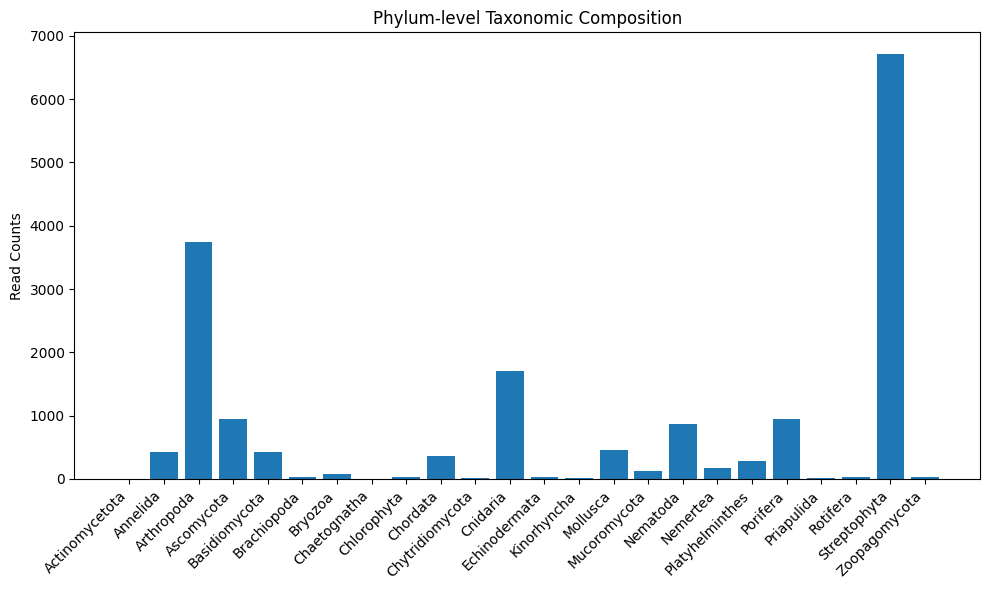

In [37]:
import matplotlib.pyplot as plt

# Collapse at phylum level
df_phylum = df_counts.groupby("phylum")["count"].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.bar(df_phylum["phylum"], df_phylum["count"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Read Counts")
plt.title("Phylum-level Taxonomic Composition")
plt.tight_layout()
plt.show()


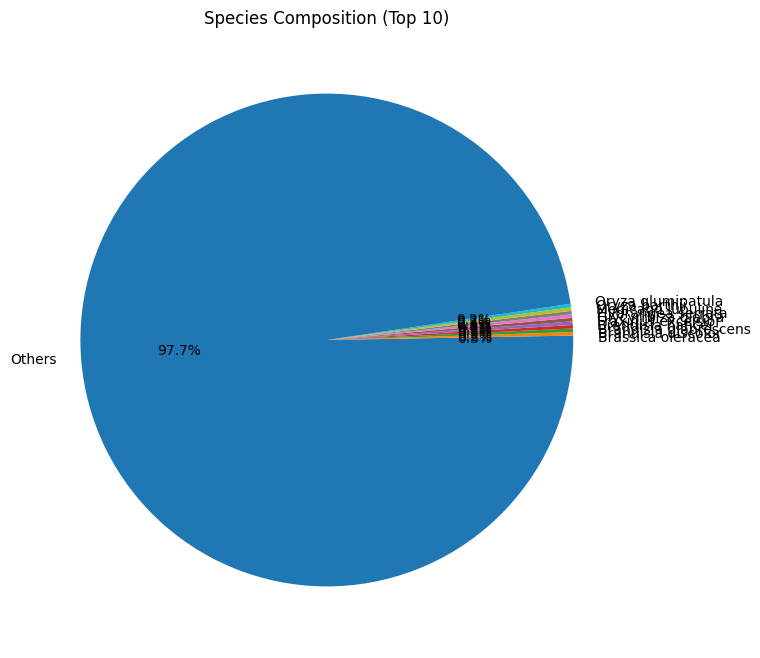

In [38]:
# Collapse at species level
df_species = df_counts.groupby("species")["count"].sum().reset_index()

# Take top 10 species + lump the rest
top10 = df_species.nlargest(10, "count")
others = pd.DataFrame({"species":["Others"], "count":[df_species["count"].sum()-top10["count"].sum()]})
df_species_plot = pd.concat([top10, others])

# Pie plot
plt.figure(figsize=(8,8))
plt.pie(df_species_plot["count"], labels=df_species_plot["species"], autopct="%1.1f%%")
plt.title("Species Composition (Top 10)")
plt.show()


In [39]:
import pandas as pd
import numpy as np

# Load taxonomy summary table
df = pd.read_csv("/content/drive/MyDrive/P2-edna/results/taxonomy_summary.csv")

# For one sample, treat counts as abundances
counts = df["count"].values

# Shannon index
p = counts / counts.sum()
shannon = -np.sum(p * np.log(p))

# Simpson index
simpson = 1 - np.sum(p**2)

print(f"✅ Alpha diversity metrics:")
print(f"Shannon index: {shannon:.3f}")
print(f"Simpson index: {simpson:.3f}")


✅ Alpha diversity metrics:
Shannon index: 7.120
Simpson index: 0.999


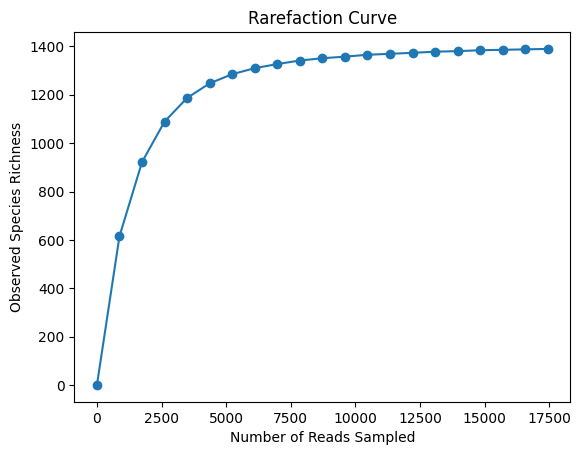

In [40]:
import random
import matplotlib.pyplot as plt

def rarefaction(counts, iterations=100):
    x, y = [], []
    total = sum(counts)
    for depth in range(1, total+1, total//20):  # 20 points
        richness = []
        for _ in range(iterations):
            subsample = random.choices(range(len(counts)), weights=counts, k=depth)
            richness.append(len(set(subsample)))
        x.append(depth)
        y.append(np.mean(richness))
    return x, y

x, y = rarefaction(counts)
plt.plot(x, y, marker="o")
plt.xlabel("Number of Reads Sampled")
plt.ylabel("Observed Species Richness")
plt.title("Rarefaction Curve")
plt.show()


# new bray curtis tract 2 diff sample


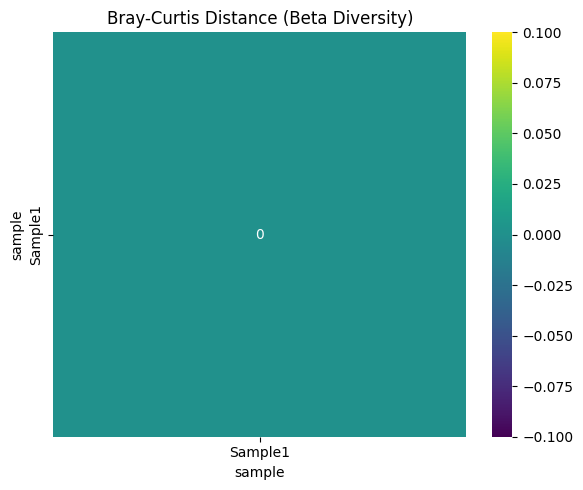

In [41]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure df_merged is loaded from your previous steps
df_merged = pd.read_csv("/content/drive/MyDrive/P2-edna/results/blast_with_lineage.csv")

# Check if the dataframe is empty
if df_merged.empty:
    print("⚠️ No BLAST hits found. Cannot compute Bray-Curtis distances.")
else:
    # Add a sample column if it doesn't exist (for single sample)
    if "sample" not in df_merged.columns:
        df_merged["sample"] = "Sample1"

    # Identify the species column
    species_col = "species"
    if species_col not in df_merged.columns:
        raise KeyError(f"Column '{species_col}' not found in the dataframe.")

    # Count species occurrences per sample
    df_counts = df_merged.groupby(["sample", species_col]).size().reset_index(name="count")

    # Pivot table: samples as rows, species as columns
    pivot = df_counts.pivot_table(
        index="sample", columns=species_col, values="count", fill_value=0
    )

    # Compute Bray-Curtis distance matrix
    dist_matrix = pd.DataFrame(
        squareform(pdist(pivot.values, metric="braycurtis")),
        index=pivot.index,
        columns=pivot.index
    )

    # Plot heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(dist_matrix, annot=True, cmap="viridis")
    plt.title("Bray-Curtis Distance (Beta Diversity)")
    plt.tight_layout()
    plt.show()


# unknown info


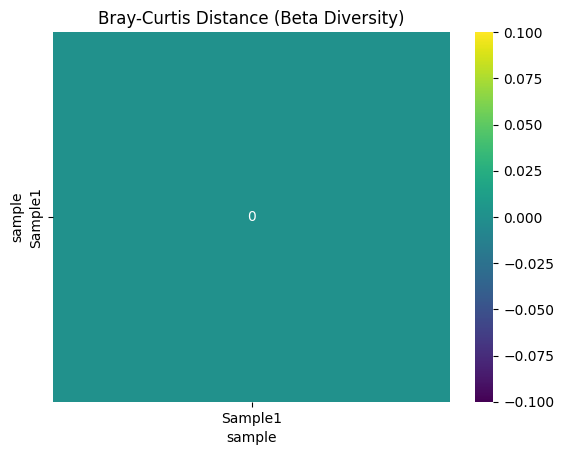

In [42]:
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

# Suppose df_counts has multiple samples (add a column "sample" if not yet)
# For now, simulate one sample as "Sample1"
df["sample"] = "Sample1"
pivot = df.pivot_table(index="sample", columns="species", values="count", fill_value=0)

# Distance matrix (Bray-Curtis)
dist_matrix = pd.DataFrame(
    squareform(pdist(pivot.values, metric="braycurtis")),
    index=pivot.index, columns=pivot.index
)

sns.heatmap(dist_matrix, annot=True, cmap="viridis")
plt.title("Bray-Curtis Distance (Beta Diversity)")
plt.show()


In [43]:
%%bash
# ==============================
# 1. Install tools
# ==============================
apt-get -q install -y seqtk vsearch ncbi-blast+

# ==============================
# 2. Run BLAST against marker DBs
# ==============================
for DB in 16S_ribosomal_RNA SSU_eukaryote_rRNA LSU_eukaryote_rRNA ITS_eukaryote_sequences; do
    echo "[INFO] Running BLAST against $DB..."
    blastn -query filtered_reads.fasta \
           -db /content/drive/MyDrive/P2-edna/db/$DB \
           -out ${DB}_hits.out -outfmt 6 -num_threads 2 -evalue 1e-5
done

# ==============================
# 3. Define extraction helper
# ==============================
extract() {
  local hits="$1"
  local tag="$2"
  local fasta_in="filtered_reads.fasta"
  local ids="${tag}_readIDs.txt"
  local fasta_out="${tag}_reads.fasta"

  if [ -s "$hits" ]; then
    cut -f1 "$hits" | sort -u > "$ids"
    awk '{print $0"\n"$0"/1\n"$0"/2"}' "$ids" | sort -u > "${ids}.expanded"
    seqtk subseq "$fasta_in" "${ids}.expanded" > "$fasta_out" || true

    if [ ! -s "$fasta_out" ]; then
      echo "[WARN] No sequences extracted for $tag with strict IDs. Trying relaxed approach..."
      grep -F -f <(sed 's/^/>/' "${ids}.expanded") -n "$fasta_in" | cut -d: -f1 \
        | xargs -I{} -n1 sh -c 'sed -n "{},{}p" '"$fasta_in" | awk 'NR%2==1{print; next} {print}' > "$fasta_out"
    fi

    if [ -s "$fasta_out" ]; then
      echo "[OK] Extracted $(grep -c '^>' "$fasta_out") sequences to $fasta_out"
    else
      echo "[INFO] $tag had hits, but no sequences extracted."
    fi
  else
    echo "[INFO] No hits in $hits; skipping $tag extraction."
    : > "$fasta_out"
  fi
}

# ==============================
# 4. Extract reads for each marker
# ==============================
extract 16S_ribosomal_RNA_hits.out 16S
extract SSU_eukaryote_rRNA_hits.out SSU
extract LSU_eukaryote_rRNA_hits.out LSU
extract ITS_eukaryote_sequences_hits.out ITS

# ==============================
# 5. Combine marker reads
# ==============================
cat 16S_reads.fasta SSU_reads.fasta LSU_reads.fasta ITS_reads.fasta > markers_all.fasta
echo "[INFO] Combined markers_all.fasta contains $(grep -c '^>' markers_all.fasta) sequences."

# ==============================
# 6. VSEARCH clustering pipeline
# ==============================
echo "[INFO] Running VSEARCH clustering..."
vsearch --derep_fulllength markers_all.fasta \
        --output derep.fasta \
        --sizeout \
        --uc derep.uc

vsearch --cluster_size derep.fasta \
        --id 0.97 \
        --centroids otu_centroids.fasta \
        --uc otu_clusters.uc

vsearch --usearch_global markers_all.fasta \
        --db otu_centroids.fasta \
        --id 0.97 \
        --otutabout otu_table.txt

echo "[DONE] OTU clustering complete."
echo "OTU table saved as otu_table.txt"


Reading package lists...
Building dependency tree...
Reading state information...
ncbi-blast+ is already the newest version (2.12.0+ds-3build1).
seqtk is already the newest version (1.3-2).
The following NEW packages will be installed:
  vsearch
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 380 kB of archives.
After this operation, 634 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 vsearch amd64 2.21.1-1 [380 kB]
Fetched 380 kB in 1s (559 kB/s)
Selecting previously unselected package vsearch.
(Reading database ... 127283 files and directories currently installed.)
Preparing to unpack .../vsearch_2.21.1-1_amd64.deb ...
Unpacking vsearch (2.21.1-1) ...
Setting up vsearch (2.21.1-1) ...
Processing triggers for man-db (2.10.2-1) ...
[INFO] Running BLAST against 16S_ribosomal_RNA...
[INFO] Running BLAST against SSU_eukaryote_rRNA...
[INFO] Running BLAST against LSU_eukaryote_rRNA...
[INFO] Running BLAST aga

vsearch v2.21.1_linux_x86_64, 12.7GB RAM, 2 cores
https://github.com/torognes/vsearch

Dereplicating file markers_all.fasta 100%
792 nt in 22 seqs, min 36, max 36, avg 36
Sorting 100%
10 unique sequences, avg cluster 2.2, median 2, max 4
Writing FASTA output file 100%
Writing uc file, first part 100%
Writing uc file, second part 100%
vsearch v2.21.1_linux_x86_64, 12.7GB RAM, 2 cores
https://github.com/torognes/vsearch

Reading file derep.fasta 100%
360 nt in 10 seqs, min 36, max 36, avg 36
Masking 100%
Sorting by abundance 100%
Counting k-mers 100%
Clustering 100%
Sorting clusters 100%
Writing clusters 100%
Clusters: 5 Size min 1, max 4, avg 2.0
Singletons: 3, 30.0% of seqs, 60.0% of clusters
vsearch v2.21.1_linux_x86_64, 12.7GB RAM, 2 cores
https://github.com/torognes/vsearch

Reading file otu_centroids.fasta 100%
180 nt in 5 seqs, min 36, max 36, avg 36
Masking 100%
Counting k-mers 100%
Creating k-mer index 100%
Searching 100%
Matching unique query sequences: 22 of 22 (100.00%)
Writi

# mock

In [44]:
%%bash
# Create a mock FASTA file with some synthetic reads
cat <<EOF > filtered_reads.fasta
>read1
AGAGTTTGATCCTGGCTCAGGATGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAGCGGTAGAGAG
>read2
ACGTACGTGACCTGACTGAGCTAGCTAGCTAGCTGACTGACGATCGTAGCTAGCTAGCATCGATCGATC
>read3
TTGACCGTTAACCGGTAGCTGACTACGTACGTAGCTAGTCGATGCTAGCTAGCTGATCGATCGTACGTA
>read4
GCTAGCTAGCTAGCTTACGATCGTACGATCGTACGTAGCTAGCTAGCTAGCGTAGCTAGTCGATGCTAG
>read5
CTAGCTGACTGATCGATCGATCGTAGCTAGCATCGATGCTAGTCGATGCTAGCTAGCTGACTGACTGAT
EOF

echo "[INFO] Created filtered_reads.fasta with $(grep -c '^>' filtered_reads.fasta) reads"


[INFO] Created filtered_reads.fasta with 5 reads


In [45]:
# Move into your DB folder
!mkdir -p /content/drive/MyDrive/P2-edna/db
%cd /content/drive/MyDrive/P2-edna/db

# Download the 16S reference database
!wget ftp://ftp.ncbi.nlm.nih.gov/blast/db/16S_ribosomal_RNA.tar.gz

# Extract it
!tar -xvzf 16S_ribosomal_RNA.tar.gz


/content/drive/MyDrive/P2-edna/db
--2025-09-09 19:18:08--  ftp://ftp.ncbi.nlm.nih.gov/blast/db/16S_ribosomal_RNA.tar.gz
           => ‘16S_ribosomal_RNA.tar.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.13, 130.14.250.31, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /blast/db ... done.
==> SIZE 16S_ribosomal_RNA.tar.gz ... 67616532
==> PASV ... done.    ==> RETR 16S_ribosomal_RNA.tar.gz ... done.
Length: 67616532 (64M) (unauthoritative)

16S_ribosomal_RNA.t 100%[===================>]  64.48M  31.4MB/s    in 2.1s    

2025-09-09 19:18:10 (31.4 MB/s) - ‘16S_ribosomal_RNA.tar.gz’ saved [67616532]

16S_ribosomal_RNA.ndb
16S_ribosomal_RNA.nhr
16S_ribosomal_RNA.nin
16S_ribosomal_RNA.nnd
16S_ribosomal_RNA.nni
16S_ribosomal_RNA.nog
16S_ribosomal_RNA.nos
16S_ribosomal_RNA.not
16S_ribosomal_RNA.n

In [46]:
# SSU
!wget ftp://ftp.ncbi.nlm.nih.gov/blast/db/SSU_eukaryote_rRNA.tar.gz
!tar -xvzf SSU_eukaryote_rRNA.tar.gz

# LSU
!wget ftp://ftp.ncbi.nlm.nih.gov/blast/db/LSU_eukaryote_rRNA.tar.gz
!tar -xvzf LSU_eukaryote_rRNA.tar.gz

# ITS
!wget ftp://ftp.ncbi.nlm.nih.gov/blast/db/ITS_eukaryote_sequences.tar.gz
!tar -xvzf ITS_eukaryote_sequences.tar.gz


--2025-09-09 19:18:25--  ftp://ftp.ncbi.nlm.nih.gov/blast/db/SSU_eukaryote_rRNA.tar.gz
           => ‘SSU_eukaryote_rRNA.tar.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.13, 130.14.250.31, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /blast/db ... done.
==> SIZE SSU_eukaryote_rRNA.tar.gz ... 59776957
==> PASV ... done.    ==> RETR SSU_eukaryote_rRNA.tar.gz ... done.
Length: 59776957 (57M) (unauthoritative)

SSU_eukaryote_rRNA. 100%[===================>]  57.01M  33.7MB/s    in 1.7s    

2025-09-09 19:18:27 (33.7 MB/s) - ‘SSU_eukaryote_rRNA.tar.gz’ saved [59776957]

taxdb.btd
taxdb.bti
taxonomy4blast.sqlite3
SSU_eukaryote_rRNA.nin
SSU_eukaryote_rRNA.nhr
SSU_eukaryote_rRNA.nsq
SSU_eukaryote_rRNA.nog
SSU_eukaryote_rRNA.ndb
SSU_eukaryote_rRNA.nos
SSU_eukaryote_rRNA.not
SSU_eukaryote_rRNA.n

In [47]:
!blastn -query filtered_reads.fasta -db /content/drive/MyDrive/P2-edna/db/16S_ribosomal_RNA \
        -out 16S_hits.out -outfmt 6 -num_threads 2 -evalue 1e-5 -word_size 28


# edna test run

In [48]:
%%bash
echo -e ">test1\nAGAGTTTGATCCTGGCTCAG\n>test2\nTTAGCATGGAAGGTTTCCGC" > filtered_reads.fasta


In [49]:
!ls -lh filtered_reads.fasta


-rw------- 1 root root 56 Sep  9 19:19 filtered_reads.fasta


In [50]:
!cat filtered_reads.fasta


>test1
AGAGTTTGATCCTGGCTCAG
>test2
TTAGCATGGAAGGTTTCCGC


In [51]:
!apt-get update -qq
!apt-get install -y ncbi-blast+
!which blastn
!blastn -version


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ncbi-blast+ is already the newest version (2.12.0+ds-3build1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/bin/blastn
blastn: 2.12.0+
 Package: blast 2.12.0, build Mar  8 2022 16:19:08


In [52]:
%%bash
DB_DIR="/content/drive/MyDrive/P2-edna/db"
QUERY="filtered_reads.fasta"

if [ ! -s "$QUERY" ]; then
  echo "[ERROR] Input file $QUERY not found!"
  exit 1
fi

for DB in 16S_ribosomal_RNA SSU_eukaryote_rRNA LSU_eukaryote_rRNA ITS_eukaryote_sequences; do
  echo "[INFO] Running BLAST against $DB..."
  blastn -query "$QUERY" -db "$DB_DIR/$DB" \
         -out "${DB}_hits.out" \
         -outfmt "6 qseqid staxids bitscore evalue stitle" \
         -num_threads 2 -evalue 1e-2 -word_size 11 || true

  if [ -s "${DB}_hits.out" ]; then
    echo "[OK] Hits found in ${DB}_hits.out"
    head -n 5 "${DB}_hits.out"
  else
    echo "[INFO] No hits in ${DB}"
  fi
done


[INFO] Running BLAST against 16S_ribosomal_RNA...
[OK] Hits found in 16S_ribosomal_RNA_hits.out
test1	3119006	38.1	4.12e-04	Elongatibacter sediminis strain CH-27 16S ribosomal RNA, complete sequence
test1	2969681	38.1	4.12e-04	Microcoleusiopsis ganfuensis strain CHAB 4138 clone 2 16S ribosomal RNA, partial sequence
test1	2969681	38.1	4.12e-04	Microcoleusiopsis ganfuensis strain CHAB 4138 clone 1 16S ribosomal RNA, partial sequence
test1	3016459	38.1	4.12e-04	Plectolyngbya salina strain FBCC-A1477 16S ribosomal RNA, partial sequence
test1	3016458	38.1	4.12e-04	Plectolyngbya koreana strain FBCC-A1478 16S ribosomal RNA, partial sequence
[INFO] Running BLAST against SSU_eukaryote_rRNA...
[INFO] No hits in SSU_eukaryote_rRNA
[INFO] Running BLAST against LSU_eukaryote_rRNA...
[INFO] No hits in LSU_eukaryote_rRNA
[INFO] Running BLAST against ITS_eukaryote_sequences...
[INFO] No hits in ITS_eukaryote_sequences


In [53]:
%%bash
DB_DIR="/content/drive/MyDrive/P2-edna/db"
mkdir -p "$DB_DIR"
cd "$DB_DIR"

# Download four ribosomal databases
for DB in 16S_ribosomal_RNA SSU_eukaryote_rRNA LSU_eukaryote_rRNA ITS_eukaryote_sequences; do
  echo "[INFO] Downloading $DB ..."
  wget -q ftp://ftp.ncbi.nlm.nih.gov/blast/db/${DB}.tar.gz
  echo "[INFO] Extracting $DB ..."
  tar -xzf ${DB}.tar.gz
done

echo "[DONE] All databases ready in $DB_DIR"
ls -lh $DB_DIR


[INFO] Downloading 16S_ribosomal_RNA ...
[INFO] Extracting 16S_ribosomal_RNA ...
[INFO] Downloading SSU_eukaryote_rRNA ...
[INFO] Extracting SSU_eukaryote_rRNA ...
[INFO] Downloading LSU_eukaryote_rRNA ...
[INFO] Extracting LSU_eukaryote_rRNA ...
[INFO] Downloading ITS_eukaryote_sequences ...
[INFO] Extracting ITS_eukaryote_sequences ...
[DONE] All databases ready in /content/drive/MyDrive/P2-edna/db
total 1.4G
-rw------- 1 root root  27K Sep  9 19:19 16S_hits.out
-rw------- 1 root root    0 Sep  9 19:15 16S_reads.fasta
-rw------- 1 root root  51K Sep  9 19:19 16S_ribosomal_RNA_hits.out
-rw------- 1 root root 1.4M Aug 26 09:36 16S_ribosomal_RNA.ndb
-rw------- 1 root root 4.2M Aug 26 09:36 16S_ribosomal_RNA.nhr
-rw------- 1 root root 321K Aug 26 09:36 16S_ribosomal_RNA.nin
-rw------- 1 root root 217K Aug 26 09:36 16S_ribosomal_RNA.nnd
-rw------- 1 root root  916 Aug 26 09:36 16S_ribosomal_RNA.nni
-rw------- 1 root root 107K Aug 26 09:36 16S_ribosomal_RNA.nog
-rw------- 1 root root 539K 

In [54]:
import pandas as pd

df = pd.read_csv("blast_with_lineage.csv")

# Summarize counts by species name
summary = df["stitle"].value_counts().reset_index()
summary.columns = ["Organism", "Hit_Count"]

# Show top 20 species
print(summary.head(20))


Empty DataFrame
Columns: [Organism, Hit_Count]
Index: []


In [55]:
!wget ftp://ftp.ncbi.nlm.nih.gov/pub/taxonomy/taxdump.tar.gz -P /content/drive/MyDrive/P2-edna/db


--2025-09-09 19:21:10--  ftp://ftp.ncbi.nlm.nih.gov/pub/taxonomy/taxdump.tar.gz
           => ‘/content/drive/MyDrive/P2-edna/db/taxdump.tar.gz.1’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 130.14.250.10, 130.14.250.11, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/taxonomy ... done.
==> SIZE taxdump.tar.gz ... 70611084
==> PASV ... done.    ==> RETR taxdump.tar.gz ... done.
Length: 70611084 (67M) (unauthoritative)

taxdump.tar.gz.1    100%[===================>]  67.34M  15.3MB/s    in 4.4s    

2025-09-09 19:21:15 (15.3 MB/s) - ‘/content/drive/MyDrive/P2-edna/db/taxdump.tar.gz.1’ saved [70611084]



In [56]:
import os
import tarfile
import pandas as pd

# -------------------------------------------------
# Paths
# -------------------------------------------------
DB_DIR = "/content/drive/MyDrive/P2-edna/db"
TAXDUMP = os.path.join(DB_DIR, "taxdump.tar.gz")

# Extract taxdump if needed
if not os.path.exists(os.path.join(DB_DIR, "names.dmp")) and not os.path.exists(os.path.join(DB_DIR, "taxdump", "names.dmp")):
    print("[INFO] Extracting taxdump...")
    with tarfile.open(TAXDUMP, "r:gz") as tar:
        tar.extractall(DB_DIR)

# Auto-detect path to dmp files
if os.path.exists(os.path.join(DB_DIR, "names.dmp")):
    EXTRACT_DIR = DB_DIR
elif os.path.exists(os.path.join(DB_DIR, "taxdump", "names.dmp")):
    EXTRACT_DIR = os.path.join(DB_DIR, "taxdump")
else:
    raise FileNotFoundError("Could not find names.dmp or nodes.dmp in db/ or db/taxdump/")

print(f"[INFO] Using taxonomy files from: {EXTRACT_DIR}")

# -------------------------------------------------
# Load taxonomy files
# -------------------------------------------------
names = {}
with open(os.path.join(EXTRACT_DIR, "names.dmp")) as f:
    for line in f:
        parts = [p.strip() for p in line.split("|")]
        taxid, name_txt, name_class = parts[0], parts[1], parts[3]
        if name_class == "scientific name":
            names[int(taxid)] = name_txt

nodes = {}
with open(os.path.join(EXTRACT_DIR, "nodes.dmp")) as f:
    for line in f:
        parts = [p.strip() for p in line.split("|")]
        nodes[int(parts[0])] = (int(parts[1]), parts[2])  # taxid → (parent, rank)

# -------------------------------------------------
# Load BLAST hits
# -------------------------------------------------
cols = ["qseqid", "staxids", "bitscore", "evalue", "stitle"]
df = pd.read_csv("16S_ribosomal_RNA_hits.out", sep="\t", names=cols, header=None)

# Handle multiple taxids (keep first only)
df["taxid"] = df["staxids"].str.split("[,;]").str[0].astype(int)
print("[INFO] Loaded BLAST hits:", df.shape)

# -------------------------------------------------
# Build lineage
# -------------------------------------------------
def build_lineage(taxid):
    lineage = {}
    current = taxid
    while current != 1 and current in nodes:
        parent, rank = nodes[current]
        if rank in ["species", "genus", "family", "order", "class", "phylum", "kingdom"]:
            lineage[rank] = names.get(current, f"taxid:{current}")
        current = parent
    return lineage

records = []
for tid in df["taxid"].unique():
    lin = build_lineage(tid)
    row = {"taxid": tid}
    row.update(lin)
    records.append(row)

df_tax = pd.DataFrame(records)
print("[INFO] Taxonomy table built:", df_tax.shape)

# Merge BLAST + taxonomy
df_merged = df.merge(df_tax, on="taxid", how="left")
df_merged.to_csv("blast_with_lineage.csv", index=False)
print("[DONE] Saved blast_with_lineage.csv with taxonomy hierarchy")

# -------------------------------------------------
# Aggregation at higher levels
# -------------------------------------------------
agg_levels = ["genus", "family", "order", "class", "phylum", "kingdom"]

for level in agg_levels:
    if level in df_merged.columns:
        agg = df_merged.groupby(level).size().reset_index(name="count").sort_values("count", ascending=False)
        agg.to_csv(f"agg_{level}.csv", index=False)
        print(f"[OK] Aggregated {level} table saved: agg_{level}.csv")


[INFO] Using taxonomy files from: /content/drive/MyDrive/P2-edna/db
[INFO] Loaded BLAST hits: (500, 6)
[INFO] Taxonomy table built: (451, 8)
[DONE] Saved blast_with_lineage.csv with taxonomy hierarchy
[OK] Aggregated genus table saved: agg_genus.csv
[OK] Aggregated family table saved: agg_family.csv
[OK] Aggregated order table saved: agg_order.csv
[OK] Aggregated class table saved: agg_class.csv
[OK] Aggregated phylum table saved: agg_phylum.csv
[OK] Aggregated kingdom table saved: agg_kingdom.csv


In [57]:
import pandas as pd
import os

# Check where the file actually is
!ls -lh /content | grep blast_with_lineage
!ls -lh /content/drive/MyDrive/P2-edna/db | grep blast_with_lineage

# Adjust paths
WORK_DIR = "/content"  # where your pipeline wrote the file
DB_DIR = "/content/drive/MyDrive/P2-edna/db"
RESULT_DIR = "/content/drive/MyDrive/P2-edna/results" # Corrected result directory

# Full BLAST annotated hits
blast_file = os.path.join(DB_DIR, "blast_with_lineage.csv") # Corrected path
df = pd.read_csv(blast_file)
print("[INFO] Full BLAST hits with taxonomy:")
print(df.head(10))
print("Total hits:", len(df))

# Aggregated tables
levels = ["genus", "family", "order", "class", "phylum", "kingdom"]

for lvl in levels:
    # Assuming aggregated files were also written to DB_DIR in previous steps
    agg_file = os.path.join(DB_DIR, f"agg_{lvl}.csv")
    if os.path.exists(agg_file):
        df_agg = pd.read_csv(agg_file)
        print(f"\n[INFO] Top {lvl.title()}s:")
        print(df_agg.head(10))
    else:
        print(f"[WARN] Missing file: agg_{lvl}.csv")

-rw------- 1 root root 110K Sep  9 19:21 blast_with_lineage.csv
[INFO] Full BLAST hits with taxonomy:
  qseqid  staxids  bitscore    evalue  \
0  test1  3119006      38.1  0.000412   
1  test1  2969681      38.1  0.000412   
2  test1  2969681      38.1  0.000412   
3  test1  3016459      38.1  0.000412   
4  test1  3016458      38.1  0.000412   
5  test1  3016457      38.1  0.000412   
6  test1  3349163      38.1  0.000412   
7  test1  2662126      38.1  0.000412   
8  test1  2661613      38.1  0.000412   
9  test1  2652445      38.1  0.000412   

                                              stitle    taxid  \
0  Elongatibacter sediminis strain CH-27 16S ribo...  3119006   
1  Microcoleusiopsis ganfuensis strain CHAB 4138 ...  2969681   
2  Microcoleusiopsis ganfuensis strain CHAB 4138 ...  2969681   
3  Plectolyngbya salina strain FBCC-A1477 16S rib...  3016459   
4  Plectolyngbya koreana strain FBCC-A1478 16S ri...  3016458   
5  Plectolyngbya terrestris strain FBCC-A1479 16S...  30

[INFO] Full BLAST hits: (500, 13)
  qseqid  staxids  bitscore    evalue  \
0  test1  3119006      38.1  0.000412   
1  test1  2969681      38.1  0.000412   
2  test1  2969681      38.1  0.000412   
3  test1  3016459      38.1  0.000412   
4  test1  3016458      38.1  0.000412   
5  test1  3016457      38.1  0.000412   
6  test1  3349163      38.1  0.000412   
7  test1  2662126      38.1  0.000412   
8  test1  2661613      38.1  0.000412   
9  test1  2652445      38.1  0.000412   

                                              stitle    taxid  \
0  Elongatibacter sediminis strain CH-27 16S ribo...  3119006   
1  Microcoleusiopsis ganfuensis strain CHAB 4138 ...  2969681   
2  Microcoleusiopsis ganfuensis strain CHAB 4138 ...  2969681   
3  Plectolyngbya salina strain FBCC-A1477 16S rib...  3016459   
4  Plectolyngbya koreana strain FBCC-A1478 16S ri...  3016458   
5  Plectolyngbya terrestris strain FBCC-A1479 16S...  3016457   
6  Streptococcus hepaticus strain 20-1249 16S rib...  33491

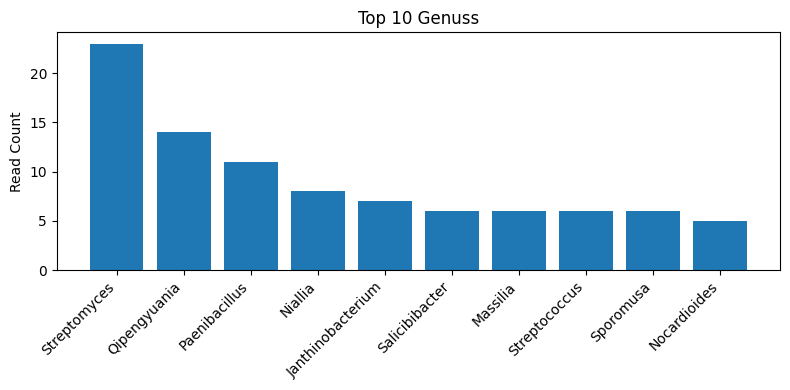

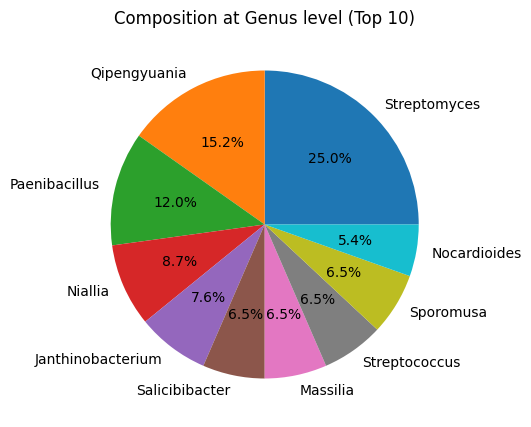

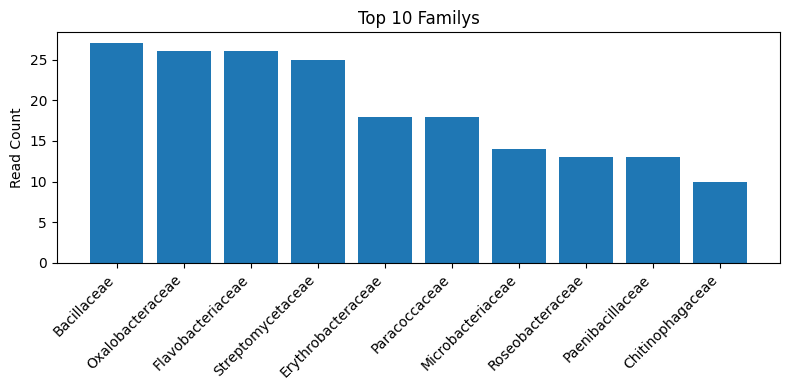

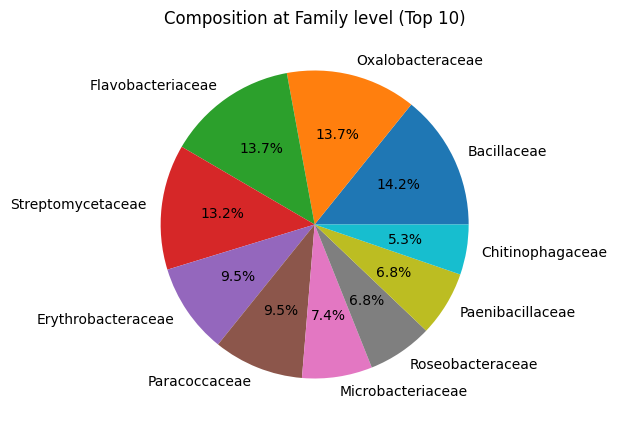

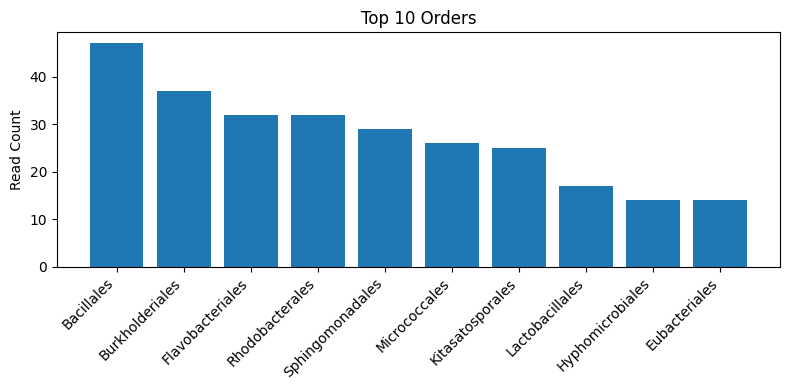

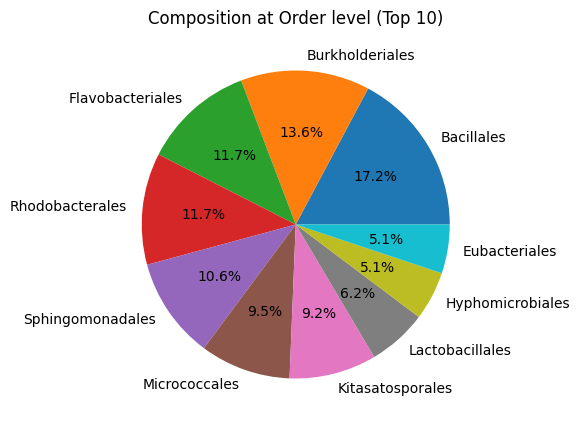

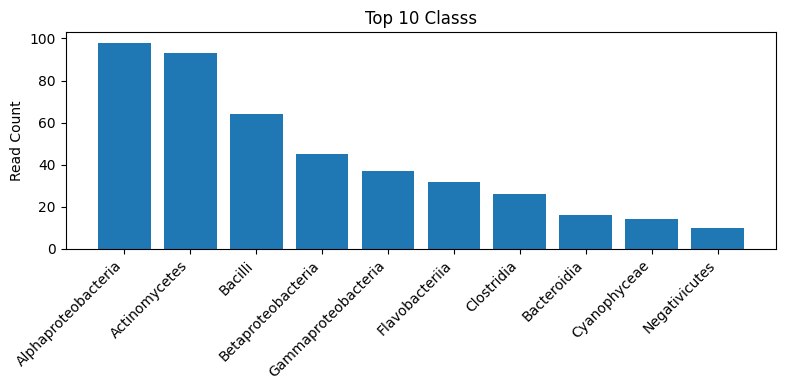

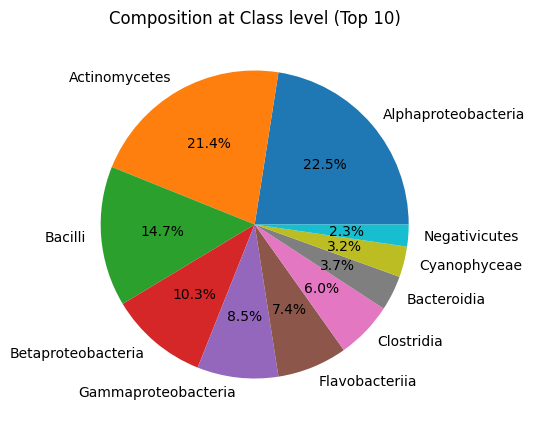

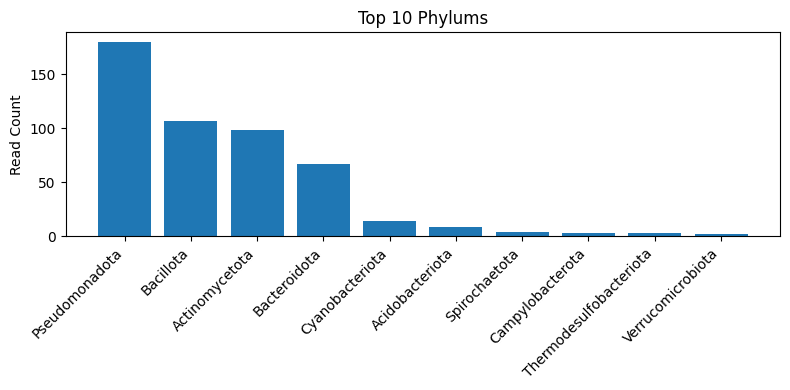

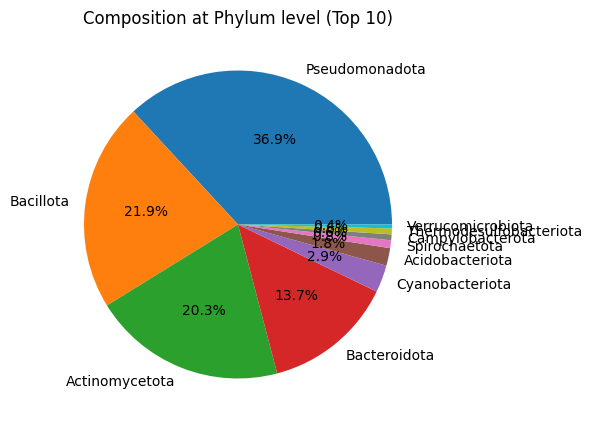

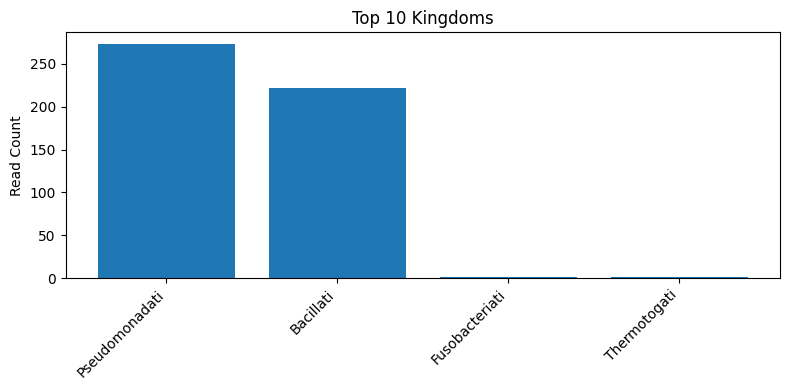

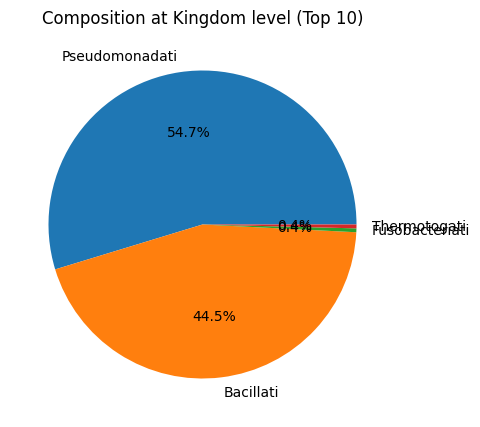

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ---------------------------
# Paths
# ---------------------------
WORK_DIR = "/content/drive/MyDrive/P2-edna/db"   # Adjust if files are elsewhere
levels = ["genus", "family", "order", "class", "phylum", "kingdom"]

# ---------------------------
# Load full BLAST + taxonomy
# ---------------------------
blast_file = os.path.join(WORK_DIR, "blast_with_lineage.csv")
df = pd.read_csv(blast_file)
print("[INFO] Full BLAST hits:", df.shape)
print(df.head(10))

# ---------------------------
# Load aggregated tables
# ---------------------------
agg_tables = {}
for lvl in levels:
    agg_file = os.path.join(WORK_DIR, f"agg_{lvl}.csv")
    if os.path.exists(agg_file):
        df_agg = pd.read_csv(agg_file)
        agg_tables[lvl] = df_agg
        print(f"[OK] Loaded {lvl} table:", df_agg.shape)
    else:
        print(f"[WARN] Missing: agg_{lvl}.csv")

# ---------------------------
# Plot helper
# ---------------------------
def plot_taxa(df, level, top_n=10):
    """Bar + pie chart for a taxonomy level"""
    if df is None or df.empty:
        print(f"[SKIP] No data for {level}")
        return

    # Take top taxa
    df_top = df.sort_values("count", ascending=False).head(top_n)

    # --- Bar chart ---
    plt.figure(figsize=(8,4))
    plt.bar(df_top[level], df_top["count"])
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Top {top_n} {level.title()}s")
    plt.ylabel("Read Count")
    plt.tight_layout()
    plt.show()

    # --- Pie chart ---
    plt.figure(figsize=(5,5))
    plt.pie(df_top["count"], labels=df_top[level], autopct="%1.1f%%")
    plt.title(f"Composition at {level.title()} level (Top {top_n})")
    plt.show()

# ---------------------------
# Run visualization for each level
# ---------------------------
for lvl in levels:
    df_lvl = agg_tables.get(lvl)
    plot_taxa(df_lvl, lvl, top_n=10)

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ---------------------------
# Paths
# ---------------------------
WORK_DIR = "/content"   # Adjust if files are elsewhere
levels = ["genus", "family", "order", "class", "phylum", "kingdom"]

# ---------------------------
# Load full BLAST + taxonomy
# ---------------------------
blast_file = os.path.join(WORK_DIR, "blast_with_lineage.csv")
df = pd.read_csv(blast_file)
print("[INFO] Full BLAST hits:", df.shape)
print(df.head(10))

# ---------------------------
# Load aggregated tables
# ---------------------------
agg_tables = {}
for lvl in levels:
    agg_file = os.path.join(WORK_DIR, f"agg_{lvl}.csv")
    if os.path.exists(agg_file):
        df_agg = pd.read_csv(agg_file)
        agg_tables[lvl] = df_agg
        print(f"[OK] Loaded {lvl} table:", df_agg.shape)
    else:
        print(f"[WARN] Missing: agg_{lvl}.csv")

# ---------------------------
# Plot helper
# ---------------------------
def plot_taxa(df, level, top_n=10):
    """Bar + pie chart for a taxonomy level"""
    if df is None or df.empty:
        print(f"[SKIP] No data for {level}")
        return

    # Take top taxa
    df_top = df.sort_values("count", ascending=False).head(top_n)

    # --- Bar chart ---
    plt.figure(figsize=(8,4))
    plt.bar(df_top[level], df_top["count"])
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Top {top_n} {level.title()}s")
    plt.ylabel("Read Count")
    plt.tight_layout()
    plt.show()

    # --- Pie chart ---
    plt.figure(figsize=(5,5))
    plt.pie(df_top["count"], labels=df_top[level], autopct="%1.1f%%")
    plt.title(f"Composition at {level.title()} level (Top {top_n})")
    plt.show()

# ---------------------------
# Run visualization for each level
# ---------------------------
for lvl in levels:
    df_lvl = agg_tables.get(lvl)
    plot_taxa(df_lvl, lvl, top_n=10)


FileNotFoundError: [Errno 2] No such file or directory: '/content/blast_with_lineage.csv'

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4
import os

WORK_DIR = "/content"
levels = ["genus", "family", "order", "class", "phylum", "kingdom"]

# --------------------------
# Load aggregated tables
# --------------------------
agg_tables = {}
for lvl in levels:
    fpath = os.path.join(WORK_DIR, f"agg_{lvl}.csv")
    if os.path.exists(fpath):
        agg_tables[lvl] = pd.read_csv(fpath)

# --------------------------
# Generate plots (save as PNG)
# --------------------------
plot_files = []
def save_plot(df, level, top_n=10):
    if df is None or df.empty:
        return
    df_top = df.sort_values("count", ascending=False).head(top_n)

    # Bar
    plt.figure(figsize=(8,4))
    plt.bar(df_top[level], df_top["count"])
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Top {top_n} {level.title()}s")
    plt.ylabel("Read Count")
    plt.tight_layout()
    bar_path = os.path.join(WORK_DIR, f"{level}_bar.png")
    plt.savefig(bar_path, dpi=150)
    plot_files.append(bar_path)
    plt.close()

    # Pie
    plt.figure(figsize=(5,5))
    plt.pie(df_top["count"], labels=df_top[level], autopct="%1.1f%%")
    plt.title(f"Composition at {level.title()} level (Top {top_n})")
    pie_path = os.path.join(WORK_DIR, f"{level}_pie.png")
    plt.savefig(pie_path, dpi=150)
    plot_files.append(pie_path)
    plt.close()

for lvl, df in agg_tables.items():
    save_plot(df, lvl)

# --------------------------
# Build PDF report
# --------------------------
report_file = os.path.join(WORK_DIR, "biodiversity_report.pdf")
doc = SimpleDocTemplate(report_file, pagesize=A4)
styles = getSampleStyleSheet()
elements = []

elements.append(Paragraph("Deep-Sea eDNA Biodiversity Report", styles['Title']))
elements.append(Spacer(1, 20))

for lvl in levels:
    if lvl in agg_tables:
        elements.append(Paragraph(f"Taxonomic Level: {lvl.title()}", styles['Heading2']))
        elements.append(Spacer(1, 10))

        # Add bar + pie images
        for plot in [f"{lvl}_bar.png", f"{lvl}_pie.png"]:
            plot_path = os.path.join(WORK_DIR, plot)
            if os.path.exists(plot_path):
                elements.append(Image(plot_path, width=400, height=250))
                elements.append(Spacer(1, 10))

doc.build(elements)
print(f"[DONE] Report saved: {report_file}")


ModuleNotFoundError: No module named 'reportlab'

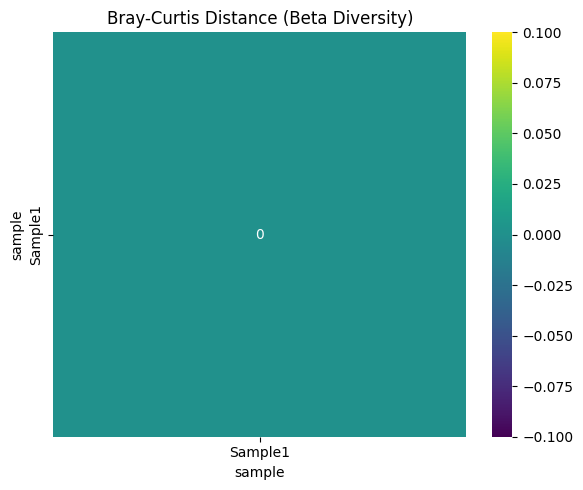

In [61]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure df_merged is loaded from your previous steps
df_merged = pd.read_csv("/content/drive/MyDrive/P2-edna/results/blast_with_lineage.csv")

# Check if the dataframe is empty
if df_merged.empty:
    print("⚠️ No BLAST hits found. Cannot compute Bray-Curtis distances.")
else:
    # Add a sample column if it doesn't exist (for single sample)
    if "sample" not in df_merged.columns:
        df_merged["sample"] = "Sample1"

    # Identify the species column
    species_col = "species"
    if species_col not in df_merged.columns:
        raise KeyError(f"Column '{species_col}' not found in the dataframe.")

    # Count species occurrences per sample
    df_counts = df_merged.groupby(["sample", species_col]).size().reset_index(name="count")

    # Pivot table: samples as rows, species as columns
    pivot = df_counts.pivot_table(
        index="sample", columns=species_col, values="count", fill_value=0
    )

    # Compute Bray-Curtis distance matrix
    dist_matrix = pd.DataFrame(
        squareform(pdist(pivot.values, metric="braycurtis")),
        index=pivot.index,
        columns=pivot.index
    )

    # Plot heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(dist_matrix, annot=True, cmap="viridis")
    plt.title("Bray-Curtis Distance (Beta Diversity)")
    plt.tight_layout()
    plt.show()


In [62]:
!pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.1 MB/s eta 0:00:00
